In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.api import OLS, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
file_path = r"ToyotaCorolla - MLR.csv"
df = pd.read_csv(file_path)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950    

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

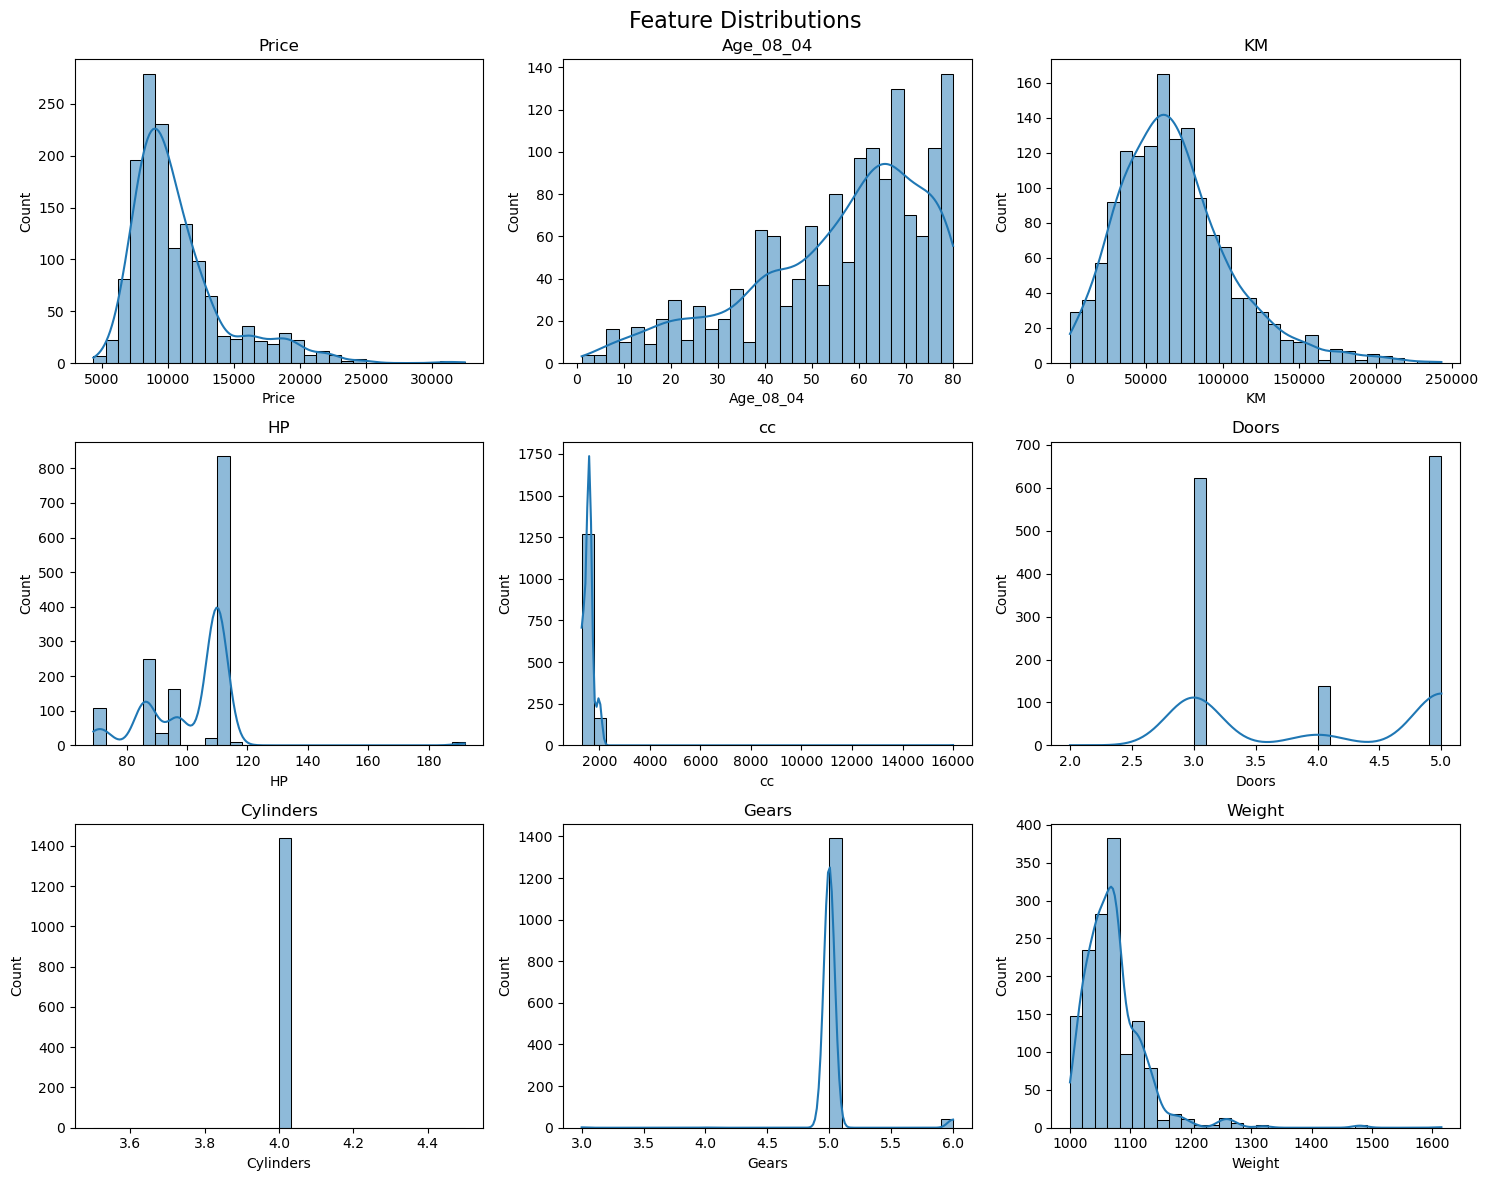

In [3]:
summary_stats = df.describe()
print(summary_stats)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Feature Distributions", fontsize=16)
numerical_columns = ["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Cylinders", "Gears", "Weight"]
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(col)
plt.tight_layout()
plt.show()

In [4]:
df = pd.get_dummies(df, columns=["Fuel_Type"], drop_first=True)
df.drop(columns=["Cylinders"], inplace=True)  # Dropping due to redundancy
df = df.apply(pd.to_numeric, errors='coerce')
print("Missing values:")
print(df.isnull().sum())

Missing values:
Price               0
Age_08_04           0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Gears               0
Weight              0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64


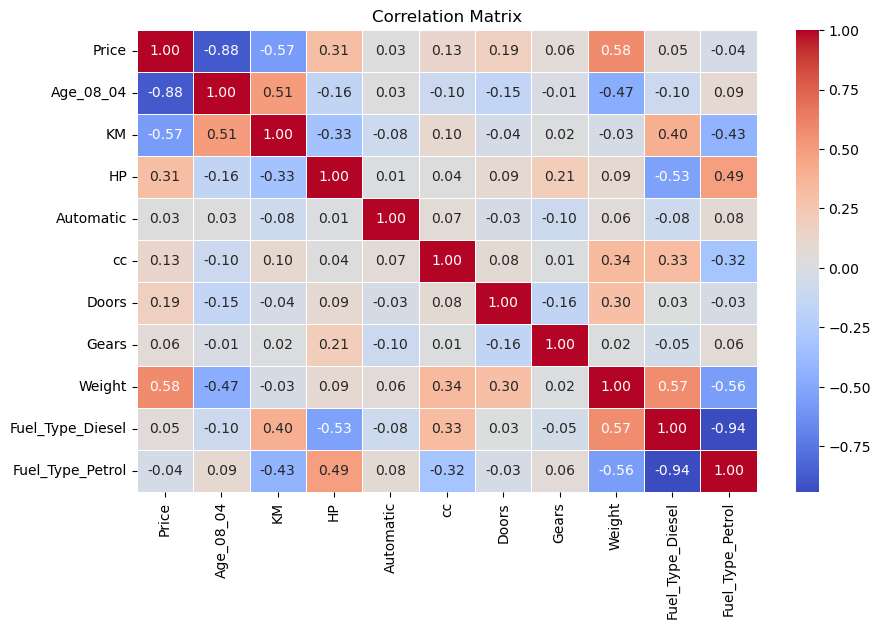

In [5]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [6]:
X = df.drop(columns=["Price"])
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print(f"Model 1 - R2: {r2_score(y_test, y_pred):.3f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}, MAE: {mean_absolute_error(y_test, y_pred):.2f}")

Model 1 - R2: 0.835, RMSE: 1484.27, MAE: 990.89


In [7]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
print(f"Model 2 - R2: {r2_score(y_test, y_pred_poly):.3f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly)):.2f}, MAE: {mean_absolute_error(y_test, y_pred_poly):.2f}")




Model 2 - R2: 0.769, RMSE: 1756.43, MAE: 896.88


In [8]:
selected_features = ["Age_08_04", "KM", "HP", "Gears", "Weight", "Fuel_Type_Petrol"]
model3 = LinearRegression()
model3.fit(X_train[selected_features], y_train)
y_pred_model3 = model3.predict(X_test[selected_features])
print(f"Model 3 - R2: {r2_score(y_test, y_pred_model3):.3f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_model3)):.2f}, MAE: {mean_absolute_error(y_test, y_pred_model3):.2f}")



Model 3 - R2: 0.835, RMSE: 1483.15, MAE: 997.81


In [9]:
X_train_const = add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
             Feature          VIF
0              const  2053.104744
1          Age_08_04     1.963717
2                 KM     2.049863
3                 HP     2.390991
4          Automatic     1.122540
5                 cc     1.194085
6              Doors     1.227924
7              Gears     1.116589
8             Weight     3.880178
9   Fuel_Type_Diesel    10.308831
10  Fuel_Type_Petrol     8.435396


In [10]:
X_train_const_float = X_train_const.astype(float)
y_train_numeric = y_train.astype(float)
ols_model = OLS(y_train_numeric, X_train_const_float).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     762.7
Date:                Fri, 11 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:53:43   Log-Likelihood:                -9863.2
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1137   BIC:                         1.980e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.426e+04   1751.390  

In [11]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print(f"Ridge - R2: {r2_score(y_test, y_pred_ridge):.3f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}, MAE: {mean_absolute_error(y_test, y_pred_ridge):.2f}")



Ridge - R2: 0.835, RMSE: 1483.15, MAE: 990.73


In [12]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print(f"Lasso - R2: {r2_score(y_test, y_pred_lasso):.3f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}, MAE: {mean_absolute_error(y_test, y_pred_lasso):.2f}")


Lasso - R2: 0.835, RMSE: 1481.68, MAE: 990.95


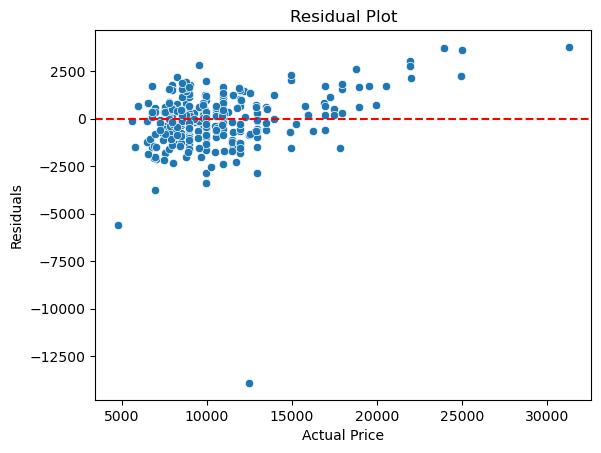

In [13]:
residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.show()


# Interview Questions:

# 1.What is Normalization & Standardization and how is it helpful?

Normalization and standardization are techniques used to adjust the values of different features (columns) in a dataset so they are on a similar scale. This is important because some machine learning models perform better when the input features are scaled properly. Normalization changes the values so they fall between 0 and 1. It's helpful when your data has varying ranges and you’re using distance-based models like K-Nearest Neighbors or K-Means. On the other hand, standardization changes the values so they have a mean of 0 and a standard deviation of 1. It’s mostly used when the data is normally distributed, and it's very useful for models like linear regression or logistic regression. These scaling methods help the models train faster and perform better by ensuring all features contribute equally.

# 2.What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity happens when two or more independent variables in a regression model are highly related to each other. This can confuse the model and make the results unreliable. To deal with this, we can first check the correlation between variables and remove one of the highly correlated ones. We can also calculate something called VIF (Variance Inflation Factor) to find which variables are causing the problem. Another way is to use Ridge or Lasso regression, which are special types of regression that reduce the impact of multicollinearity by adjusting or even removing less important variables. Alternatively, we can use PCA (Principal Component Analysis) to combine the variables into new uncorrelated ones. All these methods help make the regression model more stable and accurate